In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [ ]:
areas=[]
avg_pixel_intensity=[]
##mean Gray level
G_a=[]
##Optical Parameter R
opti_para=[]

###area
all_areas=[]

## mean_gray_level
mean_gray_level= []

my_dict={}
def img_preprocessing(imaage):
  gray = cv.cvtColor(imaage, cv.COLOR_BGR2GRAY)





  blurred= cv.GaussianBlur(gray, (5,5), 0)


  _,threshold = cv.threshold(blurred, 220, 255, cv.THRESH_BINARY)


  contours,_= cv.findContours(threshold,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)




  #Contours and Contour area
  output= cv.drawContours(imaage,contours,-1,(0,0,255),1)
  area= cv.contourArea(max(contours,key=cv.contourArea))


  mask=np.zeros_like(imaage)
  mask1 = np.zeros_like(gray)
  mask= cv.drawContours(mask,[max(contours,key=cv.contourArea)], -1, (255, 255, 255), cv.FILLED)
  mask1= cv.drawContours(mask1,[max(contours,key=cv.contourArea)], -1, (255, 255, 255), cv.FILLED)


  #average pixel density inside the contour
  avgpixel_intensity= np.mean(imaage[mask==255])

 ##mean Gray level
  avg= np.mean(gray[mask1==255])
  mean_gray_level.append(avg)

  ##Arithmetic Gray Level Average (Gₐ)
  grey_level_average= np.mean(np.abs(gray[mask1==255]-avg))


   ##Optical Parameter R
  R= np.std(gray)/np.sqrt(np.mean(gray**2))



  all_areas.append(area)
  avg_pixel_intensity.append(avgpixel_intensity)
  G_a.append(grey_level_average)
  opti_para.append(R)



  result_image= threshold.copy()

  return result_image

In [ ]:


def img_preprocessing_bright(imaage):
  gray = cv.cvtColor(imaage, cv.COLOR_BGR2GRAY)



  blurred= cv.GaussianBlur(gray, (5,5), 0)


  _,threshold = cv.threshold(blurred, 242, 255, cv.THRESH_BINARY)


  contours,_= cv.findContours(threshold,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)




  #Contours and Contour area
  output= cv.drawContours(imaage,contours,-1,(0,0,255),1)
  area= cv.contourArea(max(contours,key=cv.contourArea))


  mask=np.zeros_like(imaage)
  mask1 = np.zeros_like(gray)
  mask=cv.drawContours(mask,[max(contours,key=cv.contourArea)], -1, (0, 255, 0), cv.FILLED)
  mask1= cv.drawContours(mask1,[max(contours,key=cv.contourArea)], -1, (255, 255, 255), cv.FILLED)



  #average pixel density inside the contour
  avgpixel_intensity= np.mean(imaage[mask==255])
  ##Optical Parameter R

  R= np.std(gray)/np.sqrt(np.mean(gray**2))


   ##mean Gray level
  avg= np.mean(gray[mask1==255])
  mean_gray_level.append(avg)


  ##Arithmetic Gray Level Average (Gₐ)
  grey_level_average= np.mean(np.abs(gray[mask1==255]-avg))








  all_areas.append(area)
  avg_pixel_intensity.append(avgpixel_intensity)
  G_a.append(grey_level_average)
  opti_para.append(R)


  result_image= threshold.copy()










  return result_image

In [ ]:
'''from google.colab import files
import shutil
def write_image(image,i):
  folder_path='threshold_images'
  os.makedirs(folder_path,exist_ok=True)
  image_path= os.path.join(folder_path,f'exp{i}.png')
  cv.imwrite(image_path,image)
  shutil.make_archive(folder_path, 'zip', folder_path)
  files.download(f'{folder_path}.zip')'''

"from google.colab import files\nimport shutil\ndef write_image(image,i):\n  folder_path='threshold_images'\n  os.makedirs(folder_path,exist_ok=True)\n  image_path= os.path.join(folder_path,f'exp{i}.png')\n  cv.imwrite(image_path,image)\n  shutil.make_archive(folder_path, 'zip', folder_path)\n  files.download(f'{folder_path}.zip')"

exp1


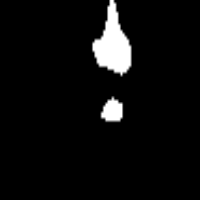

exp2


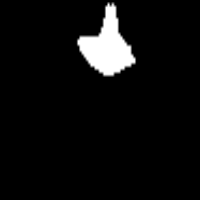

exp3


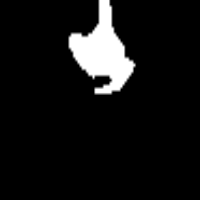

exp4


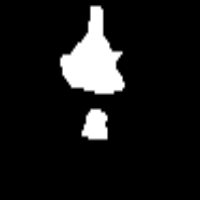

exp5


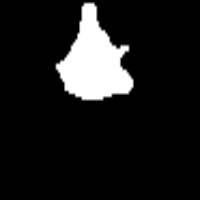

Image exp6.png not found.
exp7


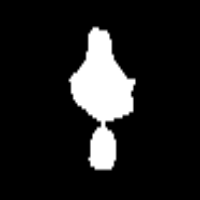

exp8


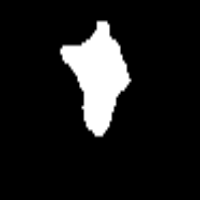

exp9


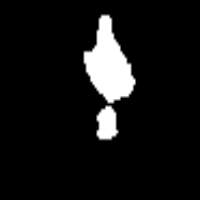

exp10


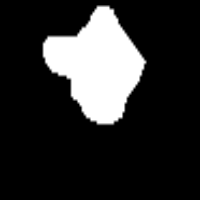

exp11


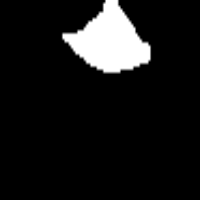

exp12


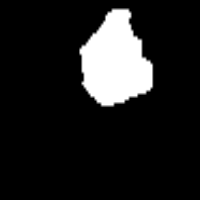

exp13


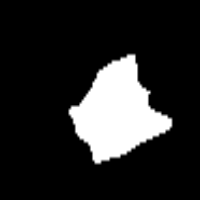

exp14


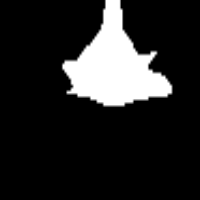

exp15


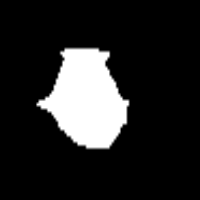

exp16


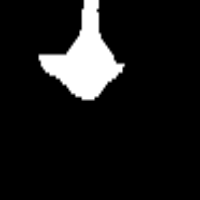

exp17


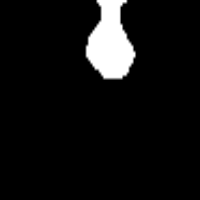

Image exp18.png not found.
exp19


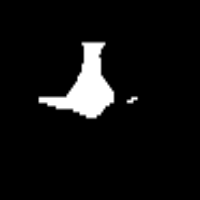

exp20


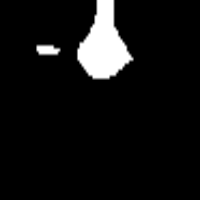

exp21


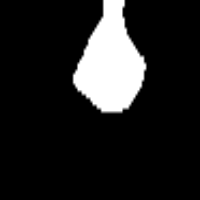

exp22


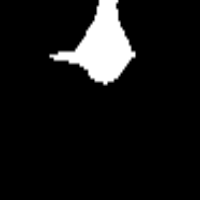

exp23


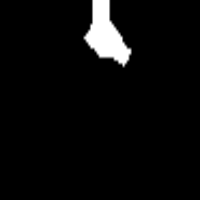

exp24


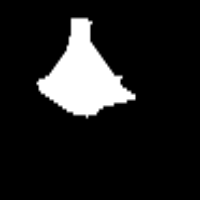

exp25


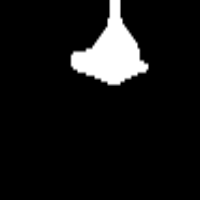

exp26


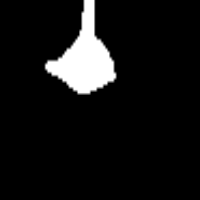

exp27


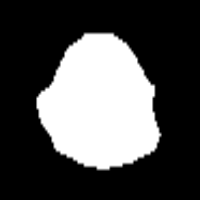

In [ ]:



for i in range(1, 28):
    img_path = f'exp{i}.png'


    img = cv.imread(img_path)


    if img is None:
        print(f"Image {img_path} not found.")
        continue
    if i == 27 or i==21 or i==1 or i==9:
      result_image =img_preprocessing_bright(img)
    else :
      result_image= img_preprocessing(img)





    resized_image= cv.resize(result_image,(200,200))
  ##  write_image(resized_image,i)
    print(f'exp{i}')
    cv2_imshow(resized_image)



In [ ]:
all_areas

[215.5,
 285.0,
 406.0,
 430.0,
 590.0,
 665.5,
 595.5,
 351.5,
 1021.5,
 513.5,
 693.5,
 883.5,
 821.5,
 844.0,
 526.0,
 356.0,
 318.0,
 351.5,
 627.0,
 450.5,
 215.5,
 663.0,
 431.5,
 421.0,
 1790.5]

In [ ]:
my_dict= {
    'experiment':[i for i in range(1,len(all_areas)+1)],
    'area':all_areas,
    'average_pixel_intensity':avg_pixel_intensity
    ,'gray_level_average Ga':G_a
    ,'Optical_Parameter R':opti_para,
    'mean_gray_level':mean_gray_level

}
all_areas

[215.5,
 285.0,
 406.0,
 430.0,
 590.0,
 665.5,
 595.5,
 351.5,
 1021.5,
 513.5,
 693.5,
 883.5,
 821.5,
 844.0,
 526.0,
 356.0,
 318.0,
 351.5,
 627.0,
 450.5,
 215.5,
 663.0,
 431.5,
 421.0,
 1790.5]

In [ ]:
import pandas as pd
df=pd.DataFrame(my_dict)
df

,experiment,area,average_pixel_intensity,gray_level_average Ga,Optical_Parameter R,mean_gray_level
0,1,215.5,193.548780,1.303589,6.309576,249.747967
1,2,285.0,207.942887,1.781582,5.459986,249.579439
2,3,406.0,206.867980,4.409722,6.355654,247.632385
3,4,430.0,213.502456,2.212547,6.571870,249.560000
4,5,590.0,217.792835,3.975583,6.570979,248.708723
5,6,665.5,214.202103,3.971041,7.202673,248.082305
6,7,595.5,220.976708,2.690589,6.915889,249.847826
7,8,351.5,208.201031,0.947763,6.955632,251.268041
8,9,1021.5,229.895062,4.110002,7.733028,250.460185
9,10,513.5,218.436494,4.032757,6.295285,248.542039


In [ ]:
df.drop('experiment',axis=1).corr()

,area,average_pixel_intensity,gray_level_average Ga,Optical_Parameter R,mean_gray_level
area,1.000000,0.793654,0.299696,-0.038422,0.084867
average_pixel_intensity,0.793654,1.000000,0.428731,0.037008,0.203742
gray_level_average Ga,0.299696,0.428731,1.000000,0.127716,-0.635559
Optical_Parameter R,-0.038422,0.037008,0.127716,1.000000,-0.235221
mean_gray_level,0.084867,0.203742,-0.635559,-0.235221,1.000000


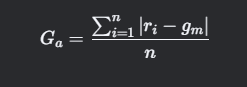

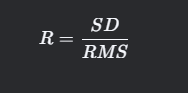

In [ ]:
df.to_csv('result.csv')

,Root mean square,shape factor,Kurtosis
0,0.001032,1.244207,-0.007282
1,0.000917,1.207979,-0.628201
2,0.000593,1.232623,-0.343480
3,0.000434,1.263296,0.170085
4,0.000417,1.273187,0.726316
5,0.000460,1.248436,-0.236299
6,0.000754,1.246191,-0.118696
7,0.001563,1.957374,240.420594
8,0.000740,1.268674,0.156974
9,0.000604,1.249059,0.207127


,experiment,area,average_pixel_intensity,gray_level_average Ga,Optical_Parameter R,Root mean square,shape factor,Kurtosis
0,1,215.5,193.548780,52.155966,6.309576,0.001032,1.244207,-0.007282
1,2,285.0,199.168224,37.867334,5.459986,0.000917,1.207979,-0.628201
2,3,406.0,198.280088,50.631946,6.355654,0.000593,1.232623,-0.343480
3,4,430.0,207.385263,53.228526,6.571870,0.000434,1.263296,0.170085
4,5,590.0,213.998442,52.741565,6.570979,0.000417,1.273187,0.726316
5,6,665.5,210.824417,60.007254,7.202673,0.000460,1.248436,-0.236299
6,7,595.5,216.711180,55.536791,6.915889,0.000754,1.246191,-0.118696
7,8,351.5,208.201031,57.701088,6.955632,0.001563,1.957374,240.420594
8,9,1021.5,227.528704,64.431769,7.733028,0.000740,1.268674,0.156974
9,10,513.5,213.980322,47.450229,6.295285,0.000604,1.249059,0.207127


,area,average_pixel_intensity,gray_level_average Ga,Optical_Parameter R,Root mean square,shape factor,Kurtosis
area,1.000000,0.859466,0.099453,-0.038422,-0.122884,-0.052086,-0.137385
average_pixel_intensity,0.859466,1.000000,0.203637,0.051631,0.021239,0.037678,-0.044080
gray_level_average Ga,0.099453,0.203637,1.000000,0.964054,0.413325,0.194321,0.194133
Optical_Parameter R,-0.038422,0.051631,0.964054,1.000000,0.352959,0.142248,0.154054
Root mean square,-0.122884,0.021239,0.413325,0.352959,1.000000,0.575539,0.587629
shape factor,-0.052086,0.037678,0.194321,0.142248,0.575539,1.000000,0.979974
Kurtosis,-0.137385,-0.044080,0.194133,0.154054,0.587629,0.979974,1.000000
